In [1]:
import matplotlib.pyplot as plt
import numpy as np
import emd
from scipy import signal
from numpy.fft import irfft
import pandas as pd


In [2]:
def ms(x):
    """Mean value of signal `x` squared.
    :param x: Dynamic quantity.
    :returns: Mean squared of `x`.
    """
    return (np.abs(x)**2.0).mean()

def normalize(y, x=None):
    """normalize power in y to a (standard normal) white noise signal.
    Optionally normalize to power in signal `x`.
    #The mean power of a Gaussian with :math:`\\mu=0` and :math:`\\sigma=1` is 1.
    """
    #return y * np.sqrt( (np.abs(x)**2.0).mean() / (np.abs(y)**2.0).mean() )
    if x is not None:
        x = ms(x)
    else:
        x = 1.0
    return y * np.sqrt(x / ms(y))

def brown(N, state=None):
    """
    Brown noise.
    :param N: Amount of samples.
    :param state: State of PRNG.
    :type state: :class:`np.random.RandomState`
    Power decreases with -3 dB per octave.
    Power density decreases with 6 dB per octave.
    """
    state = np.random.RandomState() if state is None else state
    uneven = N % 2
    X = state.randn(N // 2 + 1 + uneven) + 1j * state.randn(N // 2 + 1 + uneven)
    S = (np.arange(len(X)) + 1)  # Filter
    y = (irfft(X / S)).real
    if uneven:
        y = y[:-1]
    return normalize(y)

def brownian_noise(seed, amplitude, variance, N):
    np.random.seed(seed)
    X_white = np.fft.rfft(np.random.randn(N))
    S = 1/np.where(np.fft.rfftfreq(N) == 0, float('inf'), np.fft.rfftfreq(N)) 
    S = (S * amplitude) / np.sqrt(np.mean(S**2))
    X_shaped = X_white * S
    return np.fft.irfft(X_shaped)

def white_noise(seed, amplitude, variance, N):
    np.random.seed(seed)
    X_white = np.fft.rfft(np.random.randn(N))
    S = 1
    S = amplitude / np.sqrt(np.mean(1**2))
    X_shaped = X_white * S
    return np.fft.irfft(X_shaped)

100000
10000


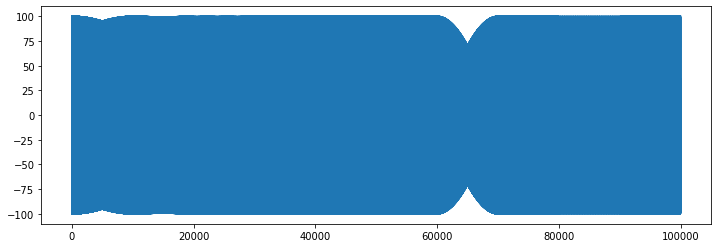

In [3]:
sample_rate = 1000
seconds = 10
num_samples = sample_rate*seconds

time_vect = np.linspace(0, seconds, num_samples)

freq = 5

# Change extent of deformation from sinusoidal shape [-1 to 1]
nonlinearity_deg = 0.25

# Change left-right skew of deformation [-pi to pi]
nonlinearity_phi = -np.pi/4

# Compute the signal

# Create a non-linear oscillation
# = emd.simulate.abreu2010(freq, nonlinearity_deg, nonlinearity_phi, sample_rate, seconds)

#x = 100*np.cos(2 * np.pi * 1 * time_vect)        # Add a simple 1Hz sinusoid
x = 100*np.cos(2 * np.pi * 100 * time_vect)
for i in range(1,10):
    x = np.append(x,100*np.cos(2 * np.pi * (100 + 400*i) * time_vect/10))

#a = np.stack([np.linspace(0, 10, 100000), x])
df = pd.DataFrame({'time':np.linspace(0, 10, 100000), 'amp':x})
df.to_csv("output/steps.csv", sep=",", float_format='%.15f',index=False, line_terminator='\n',encoding='utf-8')

#print(a.shape)
#pd.DataFrame(a).to_csv("output/steps.csv", index=False, header=False)
#np.savetxt("output/steps.csv", (np.linspace(0, 10, 100000), x), newline='\n', delimiter=',')
    
print(len(x))
print(len(time_vect))
#x -= 100*np.sin(2 * np.pi * 2.2e-1 * time_vect)   # Add part of a very slow cycle as a trend
#x += brown(num_samples)
#x += brownian_noise(0, 100, 0, num_samples)


# Visualise the time-series for analysis
plt.figure(figsize=(12, 4))
plt.plot(x)

In [6]:
imf = emd.sift.sift(x)
IP, IF, IA = emd.spectra.frequency_transform(imf, sample_rate, 'hilbert')

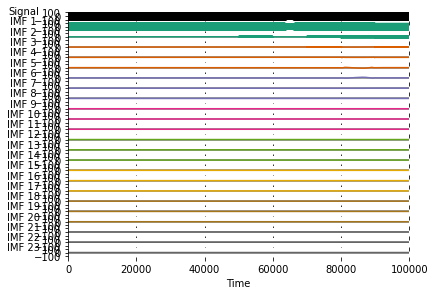

In [7]:
freq_range = (0.1, 10, 80, 'log')
f, hht = emd.spectra.hilberthuang(IF, IA, freq_range, sum_time=False)
emd.plotting.plot_imfs(imf, scale_y=True, cmap=True)

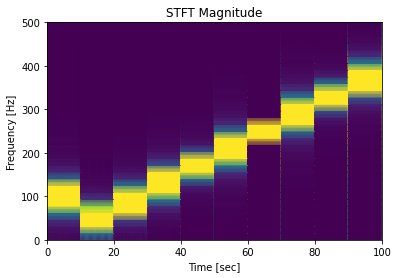

In [8]:
import math
f, t, Zxx = signal.stft(x, sample_rate, nperseg=64)
amp = math.sqrt(2) * 2
plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=amp, shading='gouraud')

plt.title('STFT Magnitude')

plt.ylabel('Frequency [Hz]')

plt.xlabel('Time [sec]')

plt.show()

[250.05]


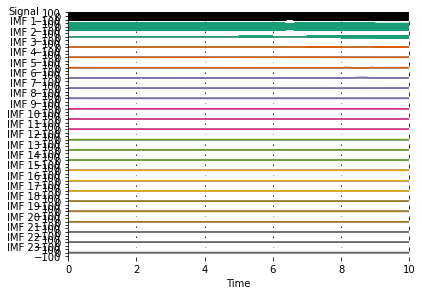

In [12]:
imf = emd.sift.sift(x)
IP, IF, IA = emd.spectra.frequency_transform(imf, 10000, 'hilbert')
freq_range = (0.1, 500, 1)
f, hht = emd.spectra.hilberthuang(IF, IA, freq_range, sum_time=False, sample_rate=10000)
print(f)
emd.plotting.plot_imfs(imf, scale_y=True, cmap=True, sample_rate = 10000)

<AxesSubplot:title={'center':'Hilbert-Huang Transform'}, xlabel='Time', ylabel='Frequency'>

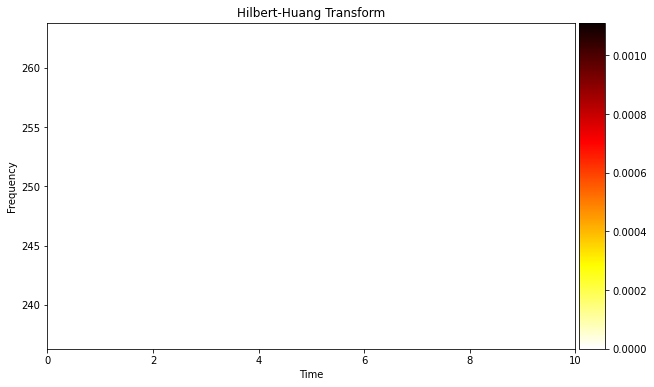

In [13]:

#print(f)
fig = plt.figure(figsize=(10, 6))
emd.plotting.plot_hilberthuang(hht, time_vect, f,
                               fig=fig)

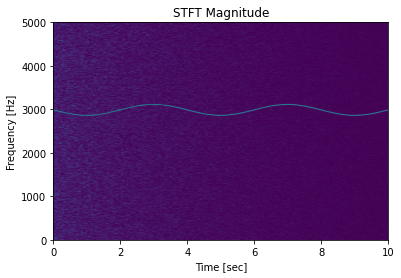

In [7]:

f, t, Zxx = signal.stft(x, fs, nperseg=1000)
plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=amp, shading='gouraud')

plt.title('STFT Magnitude')

plt.ylabel('Frequency [Hz]')

plt.xlabel('Time [sec]')

plt.show()